In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import shutil
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

# mixxing fake and real dataset
from Dataset_Folder import copyfolder
fake = 'D:\Deep_Fake\DataSet\Train\Fake'
real = 'D:\Deep_Fake\DataSet\Train\Real'
new =  'D:\Deep_Fake\DataSet\Train_Mix'


In [3]:
# copyfolder(fake, real, new)

from fake_real_count import count_file
fake_img,real_img= count_file(new)
print('Fake Images : ', fake_img)
print('real Images : ', real_img)

Fake Images :  70001
real Images :  70001


In [4]:
from Set_Labels import set_label
labels = set_label(new)
print(len(labels))

140002


In [5]:
path = 'D:/Deep_Fake/DataSet/Train_Mix/'
files = os.listdir('D:/Deep_Fake/DataSet/Train_Mix')
fake_real_img = []
labels2 = []
cnt =0


for file in files :
    cnt += 1
    if cnt%100==0:
        labels2.append(labels[cnt])
        name = path+file
        img = Image.open(name)
        img = np.array(img)
        fake_real_img.append(img)

        
        if cnt%14000==0:
            print('processed data : ', cnt )

label_map = {'fake': 0, 'real': 1}
labels_numeric = [label_map[label] for label in labels2]

processed data :  14000
processed data :  28000
processed data :  42000
processed data :  56000
processed data :  70000
processed data :  84000
processed data :  98000
processed data :  112000
processed data :  126000
processed data :  140000


In [6]:
X = np.asarray(fake_real_img)
Y = np.asarray(labels_numeric)

print('Shape of input : ',X.shape)
print('Shape of output : ',Y.shape)

Shape of input :  (1400, 256, 256, 3)
Shape of output :  (1400,)


In [7]:

# Normalize the image data
X = X.astype('float32') / 255.0

# Convert labels to categorical
Y = to_categorical(Y)

In [8]:

# Split the data into training, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_val.shape, Y_val.shape)

(980, 256, 256, 3) (980, 2)
(210, 256, 256, 3) (210, 2)
(210, 256, 256, 3) (210, 2)


In [9]:

# Load the VGG16 model without the top dense layers
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the convolutional base
conv_base.trainable = True

# Build the model
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

In [10]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:

# Print model summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [12]:

# Train the model
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 323s 10s/step - accuracy: 0.5308 - loss: 3.9256 - val_accuracy: 0.7524 - val_loss: 0.5128
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 333s 11s/step - accuracy: 0.7568 - loss: 0.4758 - val_accuracy: 0.7667 - val_loss: 0.4764
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 376s 12s/step - accuracy: 0.8393 - loss: 0.3773 - val_accuracy: 0.7714 - val_loss: 0.4603
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 381s 12s/step - accuracy: 0.8351 - loss: 0.3624 - val_accuracy: 0.7952 - val_loss: 0.4463
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 349s 11s/step - accuracy: 0.9101 - loss: 0.2447 - val_accuracy: 0.7619 - val_loss: 0.5318
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 359s 12s/step - accuracy: 0.9175 - loss: 0.2008 - val_accuracy: 0.7714 - val_loss: 0.5182
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 336s 11s/step - accuracy: 0.9246 - loss: 0.1872 - val_accuracy: 0.7762 - val_loss: 0.4850
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 359s 12s/step - accuracy: 0.9516 - loss: 0.1357 - val_accuracy: 0.

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 55s 8s/step - accuracy: 0.7861 - loss: 0.7573
Test accuracy: 0.7714285850524902


In [14]:
# Plot the training and validation accuracy and loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

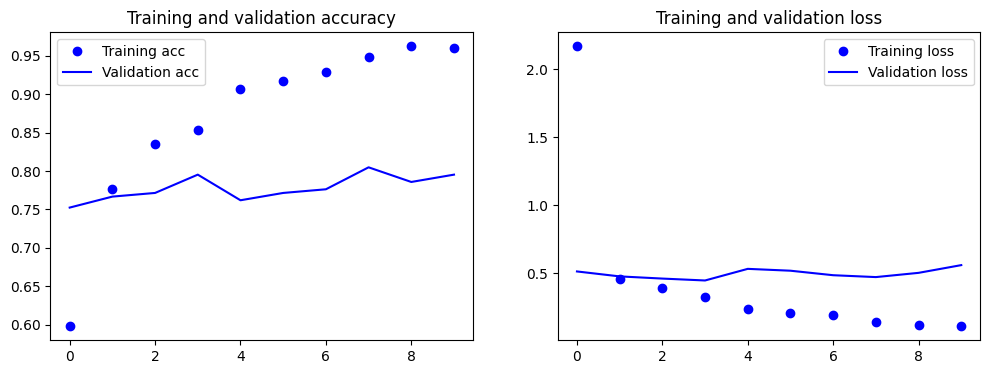

In [15]:

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:

# Predictive system
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256))
    img = np.array(img)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    label_map = {0: 'fake', 1: 'real'}
    predicted_label = np.argmax(prediction, axis=1)[0]
    return label_map[predicted_label]

# Example usage:
image_path = 'images/fimage1.jpg'
prediction = predict_image(image_path)
print(f'The predicted label for the image is: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
The predicted label for the image is: fake


In [20]:
model.save('fake_real_vgg.h5')

ValueError: Unable to synchronously create dataset (name already exists)

In [21]:
model.save('fake_real_vgg.keras')


In [44]:
model.save('fake_real_model3.h5', include_optimizer=False)


ValueError: Unable to synchronously create dataset (name already exists)